In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dfP4=pd.read_csv('P4CO2STARSCORE.csv')

### Machine learning

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [8]:
#get dammies
dfP4D= pd.get_dummies(dfP4)

In [9]:
X=dfP4D.drop('TotalGHGEmissions', axis=1)
y=dfP4D['TotalGHGEmissions']

In [10]:
#stratify
y_s = pd.qcut(y, 10, labels=False)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 , stratify=[int(x) for x in y_s.values])

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
y_train = np.array(y_train, dtype=np.int)

C:\Users\User\AppData\Local\Temp\ipykernel_9480\520895912.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.array(y_train, dtype=np.int)


### RIDGE

In [13]:
#Définition des hyperparamètres à explorer
param_grid = {'alpha':[0.1,1,10],
             'max_iter':[1000,2000,3000]
             }


In [14]:
#Création de l'estimateur RidgeCV

ridge_reg = Ridge()

In [15]:
#Création de l'objet de valdation croisée
from sklearn.model_selection import StratifiedKFold

kfolds=StratifiedKFold(n_splits=5)

In [16]:
#Création de l'objet de valdation croisée
kfolds=StratifiedKFold(n_splits=5)

In [17]:
#Recherche des meilleurs valeurs pour les hyperparamètres en utilisant GridSearchCV
clf_E_ridge=GridSearchCV(estimator=ridge_reg, param_grid=param_grid, scoring='r2', cv=kfolds.split(X_train, y_train))
clf_E_ridge.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000022A3BFBA0B0>,
             estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10], 'max_iter': [1000, 2000, 3000]},
             scoring='r2')

In [18]:
#Extraction des résultats de chaque modèke entrainé lors de la CV
cv_results=clf_E_ridge.cv_results_
cv_results_df=pd.DataFrame(cv_results)

In [19]:
#Affichage des résultats
selected_columns=['mean_test_score','std_test_score']
cv_results_selected= cv_results_df[selected_columns]

In [20]:
#Récupération du modèle final avec les hyperparamètres optimaux
best_model =clf_E_ridge.best_estimator_

In [21]:
#Prédiction sur les données de test
y_test_pred = best_model.predict(X_test)

In [22]:
#Evluation des performances avec la métrique r2 sur les donneés de test
test_r2=r2_score(y_test,y_test_pred)

In [23]:
#Affichage des résultats
print('Meilleurs hyperparamètres trouvés: ',best_model)
print('Validation score r2: ',cv_results_selected.mean_test_score.max())
print('Test r2: ', test_r2)

Meilleurs hyperparamètres trouvés:  Ridge(alpha=1, max_iter=1000)
Validation score r2:  0.5803609733146369
Test r2:  0.23678598704116482


### ELASTICNET

In [24]:
#Définition des hyperparamètres à explorer
param_grid = {'alpha':[0.1,1,10],
              'l1_ratio':[0.2, 0.5, 0.8],
             'max_iter':[1000,2000,3000]
             }

In [25]:
#Création de l'estimateur ElasticNet
elastic_net = ElasticNet()

In [26]:
#Recherche descmeilleurs valeurs pour les hyperparamètres en utilisant GridSearchCV
clf_E=GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', cv=kfolds.split(X_train, y_train))
clf_E.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000022A3C015D60>,
             estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8],
                         'max_iter': [1000, 2000, 3000]},
             scoring='r2')

In [27]:
#Extraction des résultats de chaque modèke entrainé lors de la CV
cv_results=clf_E.cv_results_
cv_results_df=pd.DataFrame(cv_results)

In [28]:
#Affichage des résultats
selected_columns=['mean_test_score','std_test_score']
cv_results_selected= cv_results_df[selected_columns]

In [29]:
#Récupération du modèle final avec les hyperparamètres optimaux
best_model =clf_E.best_estimator_

In [30]:
#Prédiction sur les données de test
y_test_pred = best_model.predict(X_test)

In [31]:
#Evluation des performances avec la métrique r2 sur les donneés de test
test_r2=r2_score(y_test,y_test_pred)

In [32]:
#Affichage des résultats
print('Meilleurs hyperparamètres trouvés: ',best_model)
print('Validation score r2: ',cv_results_selected.mean_test_score.max())
print('Test r2: ', test_r2)

Meilleurs hyperparamètres trouvés:  ElasticNet(alpha=0.1, l1_ratio=0.8)
Validation score r2:  0.57561218433378
Test r2:  0.26678967010414756


### Random Forest Regressor

In [33]:
#Définition des hyperparamètres à explorer
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [34]:
#Création de l'estimateur 
estimator = RandomForestRegressor()

In [35]:
#Recherche descmeilleurs valeurs pour les hyperparamètres en utilisant GridSearchCV
grid2=GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='r2', cv=kfolds.split(X_train, y_train))
grid2.fit(X_train, y_train)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000022A3C021900>,
             estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             scoring='r2')

In [36]:
#Extraction des résultats de chaque modèke entrainé lors de la CV
cv_results=grid2.cv_results_
cv_results_df=pd.DataFrame(cv_results)


In [37]:
#Affichage des résultats
selected_columns=['mean_test_score','std_test_score']
cv_results_selected= cv_results_df[selected_columns]

In [38]:
#Récupération du modèle final avec les hyperparamètres optimaux
best_model =grid2.best_estimator_

In [39]:
#Prédiction sur les données de test
y_test_pred = best_model.predict(X_test)

In [40]:
#Evluation des performances avec la métrique r2 sur les donneés de test
test_r2=r2_score(y_test,y_test_pred)

In [41]:
#Affichage des résultats
print('Meilleurs hyperparamètres trouvés: ',best_model)
print('Validation score r2: ',cv_results_selected.mean_test_score.max())
print('Test r2: ', test_r2)

Meilleurs hyperparamètres trouvés:  RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=30)
Validation score r2:  0.7225783495231008
Test r2:  0.49525096827294224


In [42]:
importance = grid2.best_estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.05052
Feature: 1, Score: 0.10227
Feature: 2, Score: 0.03569
Feature: 3, Score: 0.04473
Feature: 4, Score: 0.07716
Feature: 5, Score: 0.01238
Feature: 6, Score: 0.07015
Feature: 7, Score: 0.11079
Feature: 8, Score: 0.01726
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00938
Feature: 11, Score: 0.03377
Feature: 12, Score: 0.00007
Feature: 13, Score: 0.00038
Feature: 14, Score: 0.00012
Feature: 15, Score: 0.00007
Feature: 16, Score: 0.00011
Feature: 17, Score: 0.15240
Feature: 18, Score: 0.00889
Feature: 19, Score: 0.00015
Feature: 20, Score: 0.00749
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00070
Feature: 23, Score: 0.00014
Feature: 24, Score: 0.00094
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00005
Feature: 27, Score: 0.00090
Feature: 28, Score: 0.00331
Feature: 29, Score: 0.00183
Feature: 30, Score: 0.00165
Feature: 31, Score: 0.00083
Feature: 32, Score: 0.00026
Feature: 33, Score: 0.00133
Feature: 34, Score: 0.00397
Feature: 35, Score: 0.02429
Fe

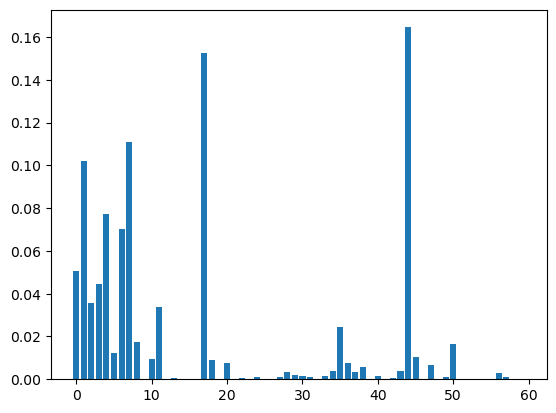

In [43]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

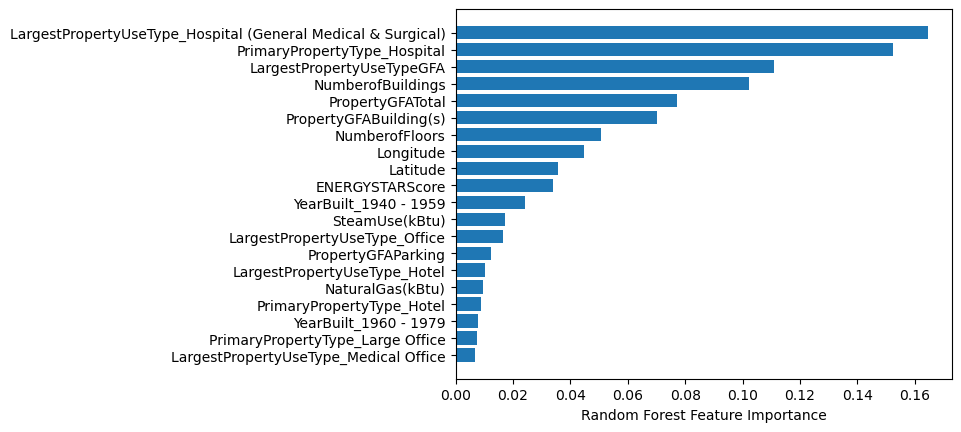

In [44]:
#plt.barh(X.columns, importance )

sorted_idx =importance.argsort()
plt.barh(X.columns[sorted_idx][-20:], importance[sorted_idx][-20:])
plt.xlabel("Random Forest Feature Importance")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


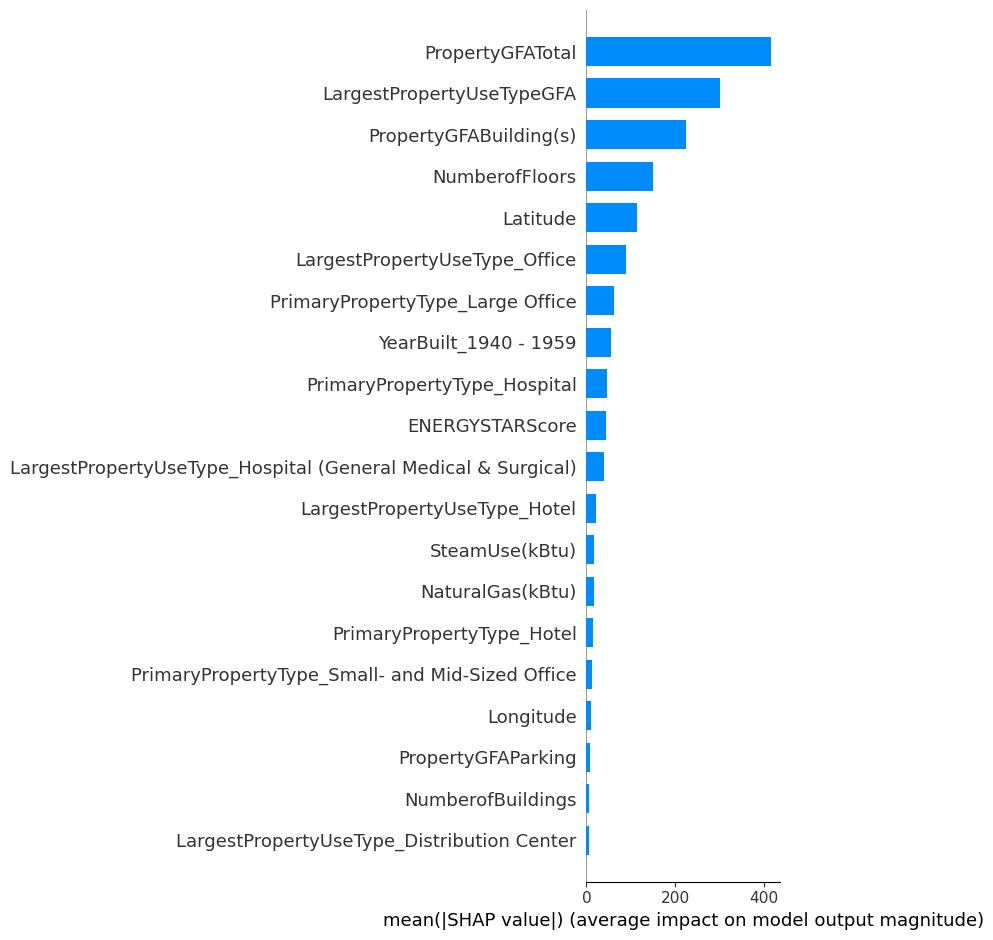

In [45]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")


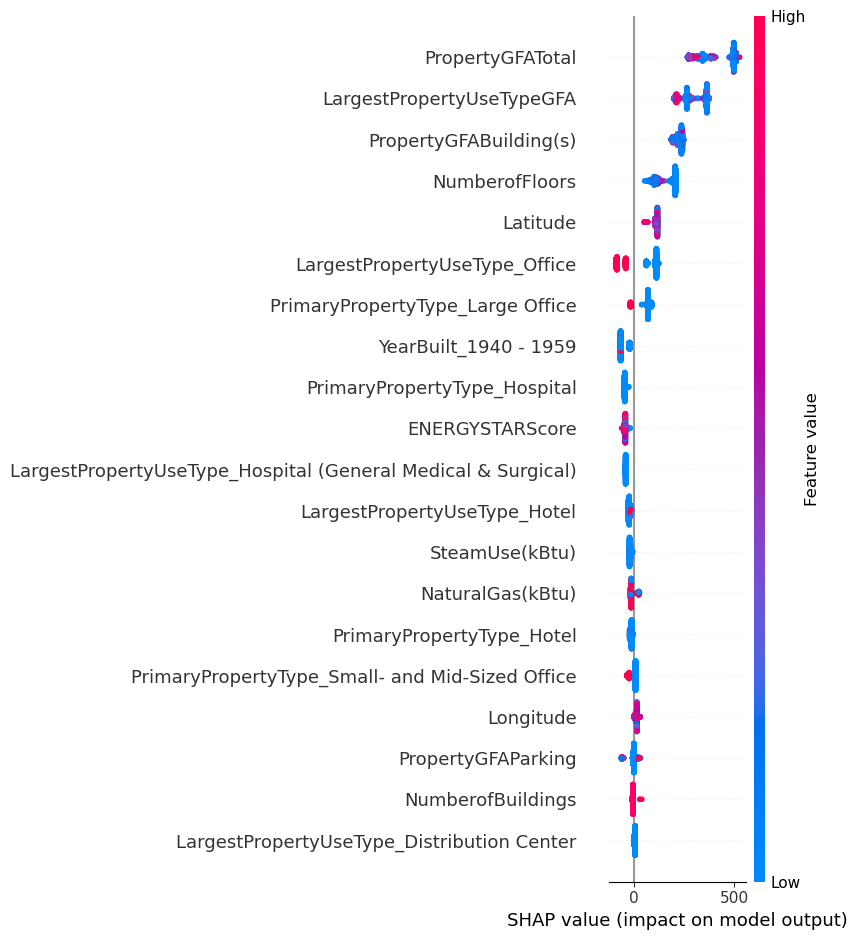

In [46]:
shap.summary_plot(shap_values, X)


In [48]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[476], features=X.loc[476], feature_names=X.columns)